In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import h5py  
import pandas as pd
import numpy as np
import os

In [2]:
df1 = pd.read_pickle("../TESTS/dataframe_POP_LME_1_random_trn4_tst20_2024-Jan-21_at_16-18.pkl")
df2 = pd.read_pickle("../TESTS/dataframe_POP_LME_2_random_trn4_tst20_2024-Jan-21_at_15-40.pkl")

In [4]:
def read_gammas1(filename, tests_dir):
    
    with h5py.File(tests_dir+filename, "r") as f:
    
        gammas = ['0.079477', '0.25133', '0.79477', '2.5133', '7.9477', '25.133', '79.477', '251.33']
        
        relaxation = []
        
        omega = []

               
        for gamma in gammas:

            relaxation.append(f["gamma_"+gamma]["gamma_relaxation"][()])

            omega.append(f["gamma_"+gamma]["omega"][()])
            
            #print(gamma)

    return gammas, omega, relaxation

def read_gammas2(filename, tests_dir):
    
    with h5py.File(tests_dir+filename, "r") as f:
    
        gammas = ['0.079477', '0.25133', '0.79477', '2.5133', '7.9477', '25.133', '79.477', '251.33']
        
        relaxation = []
        de_phasing = []

        omega = []

               
        for gamma in gammas:

            relaxation.append(f["gamma_"+gamma]["gamma_relaxation"][()])
            de_phasing.append(f["gamma_"+gamma]["gamma_de_phasing"][()])

            omega.append(f["gamma_"+gamma]["omega"][()])
            
            #print(gamma)

    return gammas, omega, relaxation, de_phasing

tests_dir = "../TESTS/"

gammas1, omega1, relaxation1 = read_gammas1("POP_LME_1_random_trn4_tst20_2024-Jan-21_at_16-18.h5", tests_dir)

gammas2, omega2, relaxation2, de_phasing2 = read_gammas2("POP_LME_2_random_trn4_tst20_2024-Jan-21_at_15-40.h5", tests_dir)

In [5]:
def nice(df):
    df.replace(to_replace= '0.079477', value = '0.079', inplace=True )
    df.replace(to_replace= '0.79477', value = '0.795', inplace=True )
    df.replace(to_replace= '0.25133', value = '0.251', inplace=True )
    df.replace(to_replace= '2.5133', value = '2.513', inplace=True )
    df.replace(to_replace= '7.9477', value = '7.948', inplace=True )

    df['Gamma'] = df['Gamma'].astype(float)

    df['Infidelity'] = df['Infidelity'].abs()

    df['Log_Infidelity'] = np.log10(df['Infidelity'])

    df.loc[df["Log_Infidelity"] < -12, "Log_Infidelity"] = -12

    return df

df1 = nice(df1)
df2 = nice(df2)

/home/zah/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/zah/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [6]:
gammas = ['0.079', '0.251', '0.795', '2.513', '7.948', '25.133', '79.477', '251.33']

In [7]:
def log_infidelity_from_gamma_ax(ax, df, title):
    
    sns.violinplot(ax=ax, data=df, x="Gamma", y="Log_Infidelity", cut = 0, # hue = "Method", split=True,
                        scale="width", palette ="cool", linewidth=0.5,
                        inner= None, bw="silverman")
    
    ymin = -6
    ymax = -0.1
    
    tick_range = np.arange(ymin, ymax)
    ax.yaxis.set_ticks(tick_range, [r'$10^{-6}$', r'$10^{-5}$', r'$10^{-4}$', r'$10^{-3}$', r'$10^{-2}$', r'$10^{-1}$',])
    ax.yaxis.set_ticks([np.log10(x) for p in tick_range for x in np.linspace(10 ** p, 10 ** (p + 1), 10)], minor=True)

    ax.set_title(title)
    ax.set_ylim(ymin, ymax)
    ax.set_xlabel(r'Coupling $\gamma$')
    ax.set_ylabel(r'Infidelity $(1-F)$')
    
    ax.hlines(y=np.log10(.01), xmin=-0.5, xmax=7.1, colors='black', linestyles='--', alpha=0.8)
    ax.text(7.2, np.log10(.01), '0.01', ha='left', va='center')
    
    ax.hlines(y=np.log10(.02), xmin=-0.5, xmax=7.1, colors='black', linestyles='--', alpha=0.8)
    ax.text(7.2, np.log10(.02), '0.02', ha='left', va='center')



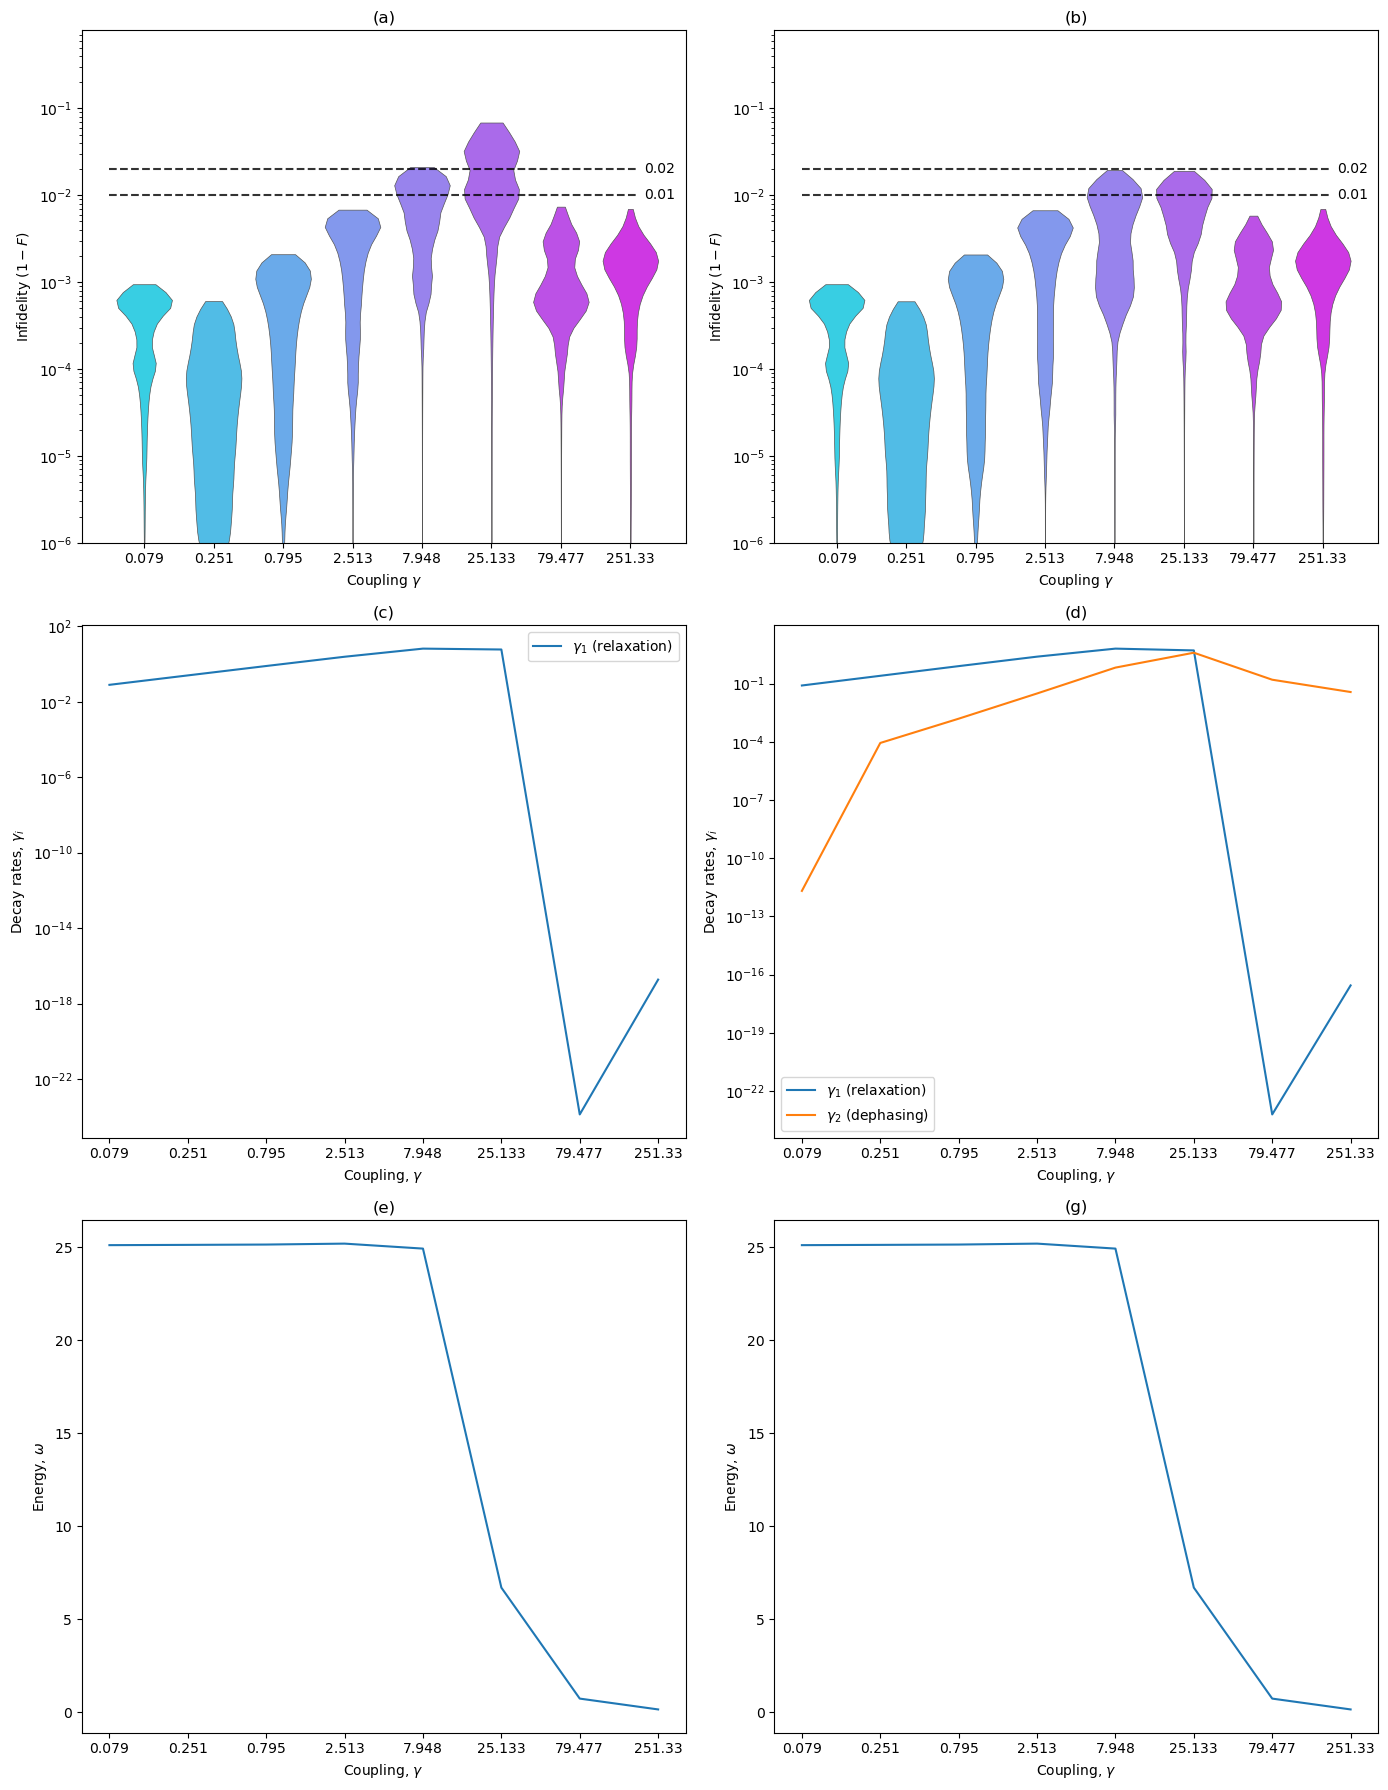

In [8]:
fig, axs = plt.subplots(3, 2, figsize=(14, 18))

log_infidelity_from_gamma_ax(axs[0,0], df1, "(a)")
log_infidelity_from_gamma_ax(axs[0,1], df2, "(b)")

axs[1,0].semilogy(gammas,relaxation1,  label=r"$\gamma_1$ (relaxation)")

axs[1,0].set_xlabel(r'Coupling, $\gamma$')
axs[1,0].set_ylabel(r"Decay rates, $\gamma_i$")
axs[1,0].set_title('(c)')
axs[1,0].legend()

axs[1,1].semilogy(gammas,relaxation2,  label=r"$\gamma_1$ (relaxation)")
axs[1,1].semilogy(de_phasing2, label=r"$\gamma_2$ (dephasing)")

axs[1,1].set_xlabel(r'Coupling, $\gamma$')
axs[1,1].set_ylabel(r"Decay rates, $\gamma_i$")
axs[1,1].set_title('(d)')
axs[1,1].legend()

axs[2,0].plot(gammas, omega1)
axs[2,0].set_title("(e)")
axs[2,0].set_ylabel(r"Energy, $\omega$")
axs[2,0].set_xlabel(r'Coupling, $\gamma$')

axs[2,1].plot(gammas, omega2)
axs[2,1].set_title("(g)")
axs[2,1].set_ylabel(r"Energy, $\omega$")
axs[2,1].set_xlabel(r'Coupling, $\gamma$')

plt.tight_layout()
plt.show()

fig.savefig("Infidelity_vs_prococesses_LME_1-2.pdf")